(hw1)=
# HW1

**Soft deadline:** 13.10.2024 23:59 (GMT+5). Penalty for violating soft deadline: $10\%$ per each day of delay.

**Hard deadline:** 20.10.2024 23:59 (GMT+5). No submissions after hard deadline are accepted.

## General recommendations

* Do not erase any existing cells

* Write solutions of the math problems in markdown cells of HW notebook using LaTeX. If you are not familiar with LaTeX, see a 2-page [cheat sheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for a quick start

* Provide your solution with understandable comments; do not submit tons of formulas and/or code  cells without any text description of what you are doing

* **Readability counts!** In case of poor writings you may receive penalty up to one point

### Task 1.1 (1 point)

Let $\boldsymbol A \in\mathbb R^{m\times n}$, $\boldsymbol B \in\mathbb R^{n\times m}$. Prove that $\mathrm{tr}(\boldsymbol{AB}) = \mathrm{tr}(\boldsymbol{BA})$. Using this property, calculate $\mathrm{tr}(\boldsymbol{uv}^\mathsf{T})$ if $\boldsymbol u, \boldsymbol v \in\mathbb R^n$, $\boldsymbol u \perp \boldsymbol v$.

### Solution

#### Proof of the Trace Property: $\mathrm{tr}(\boldsymbol{AB}) = \mathrm{tr}(\boldsymbol{BA})$

Let $\boldsymbol A \in \mathbb{R}^{m \times n}$ and $\boldsymbol B \in \mathbb{R}^{n \times m}$. We want to show that $\mathrm{tr}(\boldsymbol{AB}) = \mathrm{tr}(\boldsymbol{BA})$, where $\mathrm{tr}(\cdot)$ represents the trace of a matrix, i.e., the sum of its diagonal elements.

By the definition of matrix multiplication, the elements of the product $\boldsymbol{AB}$ are given by:

$
(\boldsymbol{AB})_{ij} = \sum_{k=1}^{n} a_{ik} b_{kj}
$

Thus, the diagonal elements of \(\boldsymbol{AB}\) are:

$
(\boldsymbol{AB})_{ii} = \sum_{k=1}^{n} a_{ik} b_{ki}
$

The trace of $\boldsymbol{AB}$ is the sum of these diagonal elements:

$
\mathrm{tr}(\boldsymbol{AB}) = \sum_{i=1}^{m} \sum_{k=1}^{n} a_{ik} b_{ki}
$

Now consider the product $\boldsymbol{BA}$. The elements of $\boldsymbol{BA}$ are given by:

$
(\boldsymbol{BA})_{ij} = \sum_{k=1}^{m} b_{ik} a_{kj}
$

So, the diagonal elements of $\boldsymbol{BA}$ are:

$
(\boldsymbol{BA})_{ii} = \sum_{k=1}^{m} b_{ik} a_{ki}
$

The trace of $\boldsymbol{BA}$ is:

$
\mathrm{tr}(\boldsymbol{BA}) = \sum_{i=1}^{n} \sum_{k=1}^{m} b_{ik} a_{ki}
$

Notice that both sums represent the same set of terms, just with indices swapped, which means:

$
\mathrm{tr}(\boldsymbol{AB}) = \mathrm{tr}(\boldsymbol{BA})
$

#### Trace of the Outer Product of Perpendicular Vectors

Now, consider two vectors $\boldsymbol u, \boldsymbol v \in \mathbb{R}^n$, where $\boldsymbol u \perp \boldsymbol v$ (i.e., $\boldsymbol u$ and $\boldsymbol v$ are orthogonal). We want to compute $\mathrm{tr}(\boldsymbol{uv}^\mathsf{T})$.

First, recall that $\boldsymbol{uv}^\mathsf{T}$ is the outer product of $\boldsymbol u$ and $\boldsymbol v$, which results in an $n \times n$ matrix. The trace of this matrix is the sum of its diagonal elements:

$
\boldsymbol{uv}^\mathsf{T} = \begin{bmatrix} u_1 v_1 & u_1 v_2 & \cdots & u_1 v_n \\ u_2 v_1 & u_2 v_2 & \cdots & u_2 v_n \\ \vdots & \vdots & \ddots & \vdots \\ u_n v_1 & u_n v_2 & \cdots & u_n v_n \end{bmatrix}
$

The diagonal elements of this matrix are $u_i v_i$ for $i = 1, 2, \dots, n$, and the trace is the sum of these diagonal elements:

$
\mathrm{tr}(\boldsymbol{uv}^\mathsf{T}) = \sum_{i=1}^{n} u_i v_i
$

Since $\boldsymbol u \perp \boldsymbol v$, the dot product $\sum_{i=1}^{n} u_i v_i = 0$ (by the definition of orthogonality). Therefore:

$
\mathrm{tr}(\boldsymbol{uv}^\mathsf{T}) = 0
$

In summary, $\mathrm{tr}(\boldsymbol{AB}) = \mathrm{tr}(\boldsymbol{BA})$, and for orthogonal vectors $\boldsymbol u$ and $\boldsymbol v$, $\mathrm{tr}(\boldsymbol{uv}^\mathsf{T}) = 0$.

## notMNIST dataset

A utility functioin for fetching and splitting notMNIST dataset:

In [65]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from glob import glob
%config InlineBackend.figure_format = 'svg'

def load_notmnist(path='./notMNIST_small',letters='ABCDEFGHIJ',
                  img_shape=(28,28),test_size=0.25,one_hot=False):
    
    # download data if it's missing. If you have any problems, go to the urls and load it manually.
    if not os.path.exists(path):
        print("Downloading data...")
        assert os.system('curl http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz > notMNIST_small.tar.gz') == 0
        print("Extracting ...")
        assert os.system('tar -zxvf notMNIST_small.tar.gz > untar_notmnist.log') == 0
    
    data,labels = [],[]
    print("Parsing...")
    for img_path in glob(os.path.join(path,'*/*')):
        class_i = img_path.split(os.sep)[-2]
        if class_i not in letters: 
            continue
        try:
            data.append(resize(imread(img_path), img_shape))
            labels.append(class_i,)
        except:
            print("found broken img: %s [it's ok if <10 images are broken]" % img_path)
        
    data = np.stack(data)[:,None].astype('float32')
    data = (data - np.mean(data)) / np.std(data)

    #convert classes to ints
    letter_to_i = {l:i for i,l in enumerate(letters)}
    labels = np.array(list(map(letter_to_i.get, labels)))
    
    if one_hot:
        labels = (np.arange(np.max(labels) + 1)[None,:] == labels[:, None]).astype('float32')
    
    #split into train/test
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, stratify=labels)
    
    print("Done")
    return X_train, y_train, X_test, y_test

Fetch and split notMNIST dataset:

In [66]:
%%time
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
CPU times: user 3.93 s, sys: 226 ms, total: 4.16 s
Wall time: 4.16 s


Size of train and test datasets:

In [8]:
X_train.shape, X_test.shape

((14043, 784), (4681, 784))

Verify that the classes are balanced:

In [5]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1404, 1405, 1405, 1404, 1405, 1404, 1404, 1404, 1404, 1404]))

Visualize some data:

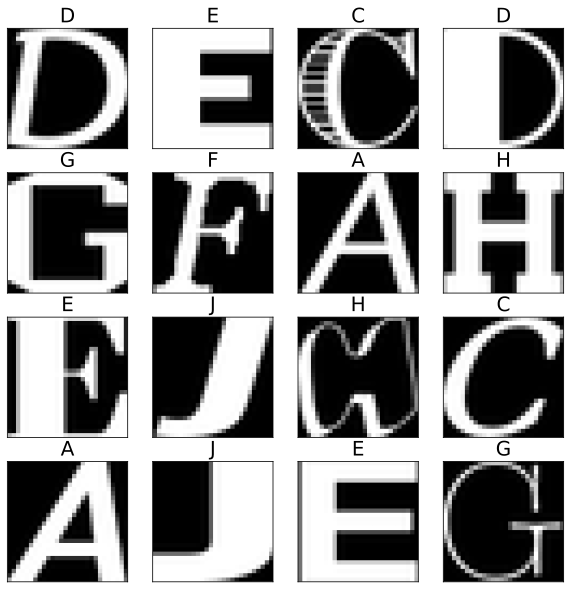

In [4]:
def plot_letters(X, y_true, y_pred=None, n=4, random_state=123):
    np.random.seed(random_state)
    indices = np.random.choice(np.arange(X.shape[0]), size=n*n, replace=False)
    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
        # plt.imshow(train_images[i], cmap=plt.cm.binary)
        if y_pred is None:
            title = chr(ord("A") + y_true[indices[i]])
        else:
            title = f"y={chr(ord('A') + y_true[indices[i]])}, ŷ={chr(ord('A') + y_pred[indices[i]])}"
        plt.title(title, size=20)
    plt.show()

plot_letters(X_train, y_train, random_state=911)

## Task 1.2 (2 points)

Apply k-NN algorithm to notMNIST dataset and measure its performance:

* train several models with different hyperparameters (take $1\leqslant k \leqslant 20$ and different distance metrics ($p=1$, $p=2$, $p=+\infty$))
* visualize several test samples and their predictions (see code below)
* show confusion matrix on train and test datasets
* plot train and test accuracies for each model on the same graph
* find the model with best test accuracy

Let's create three `KNeighborsClassifier` model for each k ($1\leqslant k \leqslant 20$), with different distance metrics using `X_train, y_train`.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ks = np.arange(1, 21)

# euclidean distanse

train_acc_p_eucl = []
test_acc_p_eucl = []

for n_neighbors in ks:
    # euclidian distance (p=2) is arg by default
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    train_acc_p_eucl.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc_p_eucl.append(accuracy_score(y_test, model.predict(X_test)))

In [12]:
train_acc_p_mink = []
test_acc_p_mink = []

for n_neighbors in ks:
    model = KNeighborsClassifier(n_neighbors=n_neighbors, p=1)
    model.fit(X_train, y_train)
    train_acc_p_mink.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc_p_mink.append(accuracy_score(y_test, model.predict(X_test)))

In [13]:
train_acc_p_inf = []
test_acc_p_inf = []

for n_neighbors in ks:
    model = KNeighborsClassifier(n_neighbors=n_neighbors, p=float('inf'))
    model.fit(X_train, y_train)
    train_acc_p_inf.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc_p_inf.append(accuracy_score(y_test, model.predict(X_test)))

In [16]:
# * find the model with best test accuracy

euclidean_best, euclidean_best_index = max(test_acc_p_eucl), test_acc_p_eucl.index(max(test_acc_p_eucl))
minkowski_best, minkowski_best_index = max(test_acc_p_mink), test_acc_p_mink.index(max(test_acc_p_mink))
infinite_best, infinite_best_index   = max(test_acc_p_inf),  test_acc_p_inf.index(max(test_acc_p_inf))

max_values = {
    'euclidean': (euclidean_best, euclidean_best_index),
    'minkowski': (minkowski_best, minkowski_best_index),
    'infinite': (infinite_best, infinite_best_index)
}
overall_best = max(max_values, key=lambda x: max_values[x][0])
best_value, best_index = max_values[overall_best]

print(f'best euclidean accuracy {euclidean_best}')
print(f'best minkowski accuracy {minkowski_best}')
print(f'best infinite accuracy {infinite_best}')

print(f"Best accuracy value: {best_value} with k= {best_index + 1} (from {overall_best})")

best euclidean accuracy 0.881221961119419
best minkowski accuracy 0.8711813715018158
best infinite accuracy 0.684682760093997
Best accuracy value: 0.881221961119419 with k= 9 (from euclidean)


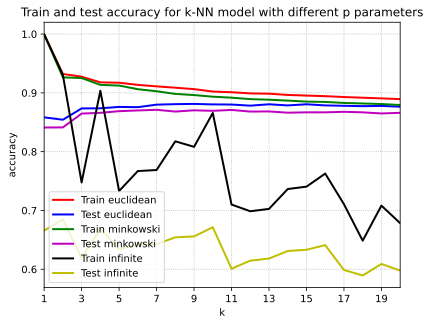

In [62]:
# * plot train and test accuracies for each model on the same graph

plt.plot(ks, train_acc_p_eucl, lw=2, c='r', label="Train euclidean")
plt.plot(ks, test_acc_p_eucl,  lw=2, c='b', label="Test euclidean")
plt.plot(ks, train_acc_p_mink, lw=2, c='g', label="Train minkowski")
plt.plot(ks, test_acc_p_mink,  lw=2, c='m', label="Test minkowski")
plt.plot(ks, train_acc_p_inf,  lw=2, c='black', label="Train infinite")
plt.plot(ks, test_acc_p_inf,   lw=2, c='y', label="Test infinite")

plt.xlim(ks[0], ks[-1])
plt.xticks(ks[::2])
plt.title("Train and test accuracy for k-NN model with different p parameters")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend()
plt.grid(ls=":")

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# As shown above best test accuracy is shown when k = 9
# Let's see its confusion matrix

# training model
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)

# Obtaning values
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

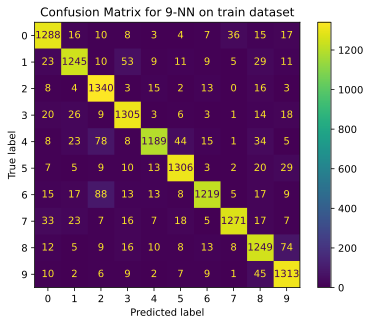

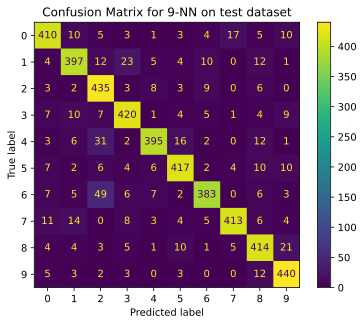

In [69]:
# * show confusion matrix on train and test datasets
# visualizing confusion matricies for 9-NN on train and test datasets

train_confusion_matrix = confusion_matrix(y_train, y_hat_train)
disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
disp.plot()
plt.title(f"Confusion Matrix for 9-NN on train dataset")
plt.show()


test_confusion_matrix = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
disp.plot()
plt.title(f"Confusion Matrix for 9-NN on test dataset")
plt.show()

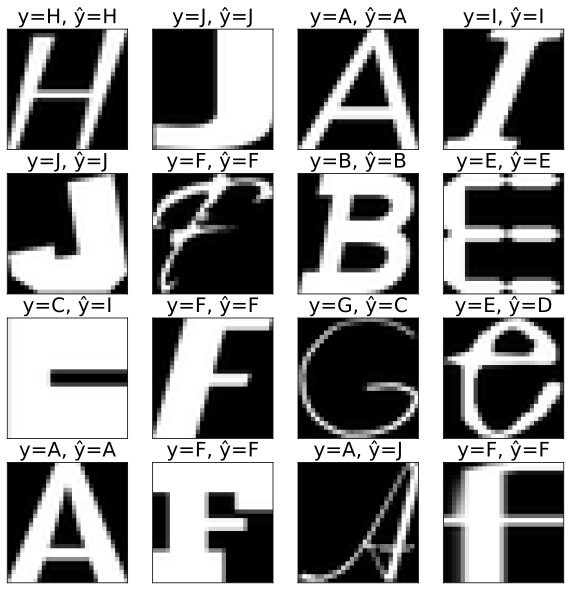

In [21]:
# * visualize several test samples and their predictions (see code above)
# from 13-NN

rng = np.random.default_rng()

plot_letters(X=X_test, y_pred=y_hat_test, y_true=y_test, random_state=rng.integers(low=100, high=999))

## Task 1.3 (2 points)

Apply logistic regression to notMNIST dataset.

* train several models with different value of $C$
* visualize several test samples and their predictions
* show confusion matrix on both train and test datasets
* plot train and test accuracies against $C$ for each model on the same graph
* find a model with best test accuracy

In [25]:
# * train several models with different value of $C$
from sklearn.linear_model import LogisticRegression

# lower the C -> higher regularization
# higher the C -> lower regularization
# 10 scaling is selected because it can
# show on what scale accuracy is being
# more volatile
C_values = [0.01, 0.1, 1, 10, 100]

# Storing results
lr_train_accuracies = []
lr_test_accuracies = []
lr_confusion_matrices = []

# Fitting the models
for C in C_values:

    # Creating the model
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Train
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    lr_train_accuracies.append(train_accuracy)
    
    # Test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    lr_test_accuracies.append(test_accuracy)
    
    # Confusion Matricies
    cm = confusion_matrix(y_test, y_test_pred)
    lr_confusion_matrices.append(cm)


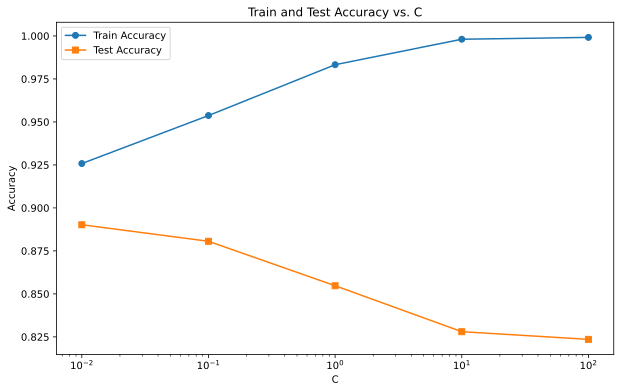

In [26]:
# * plot train and test accuracies against $C$ for each model on the same graph

# Accuracy depending on C
plt.figure(figsize=(10, 6))
plt.plot(C_values, lr_train_accuracies, label="Train Accuracy", marker='o')
plt.plot(C_values, lr_test_accuracies, label="Test Accuracy", marker='s')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. C')
plt.legend()
plt.show()

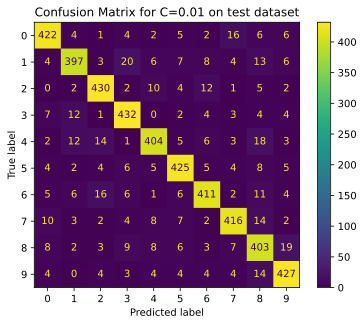

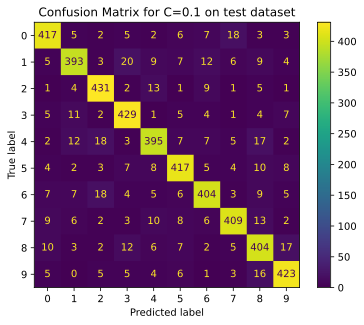

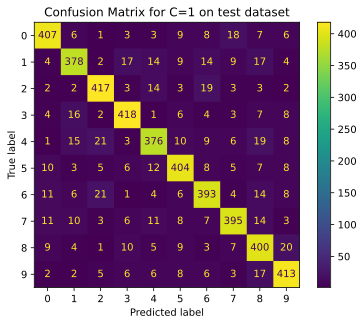

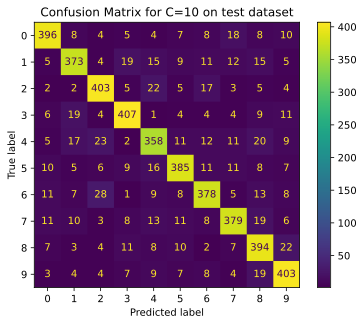

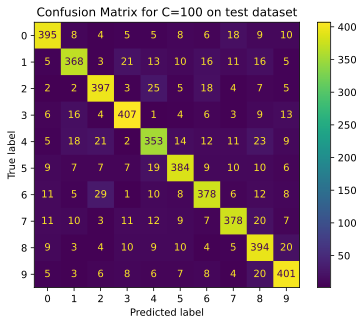

In [27]:
# * show confusion matrix on both train and test datasets
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizing Confusion Matricies for every C value
for i, C in enumerate(C_values):
    disp = ConfusionMatrixDisplay(confusion_matrix=lr_confusion_matrices[i])
    disp.plot()
    plt.title(f"Confusion Matrix for C={C} on test dataset")
    plt.show()

In [28]:
# * find a model with best test accuracy

import numpy as np

best_acc = max(lr_test_accuracies)
best_index = lr_test_accuracies.index(best_acc)
worst_acc = min(lr_test_accuracies)
worst_index = lr_test_accuracies.index(worst_acc)

best_c = best_acc
worst_c = worst_acc

print(f'Best C is {C_values[best_index]}')
print(f'Worst C is {C_values[worst_index]}')

Best C is 0.01
Worst C is 100


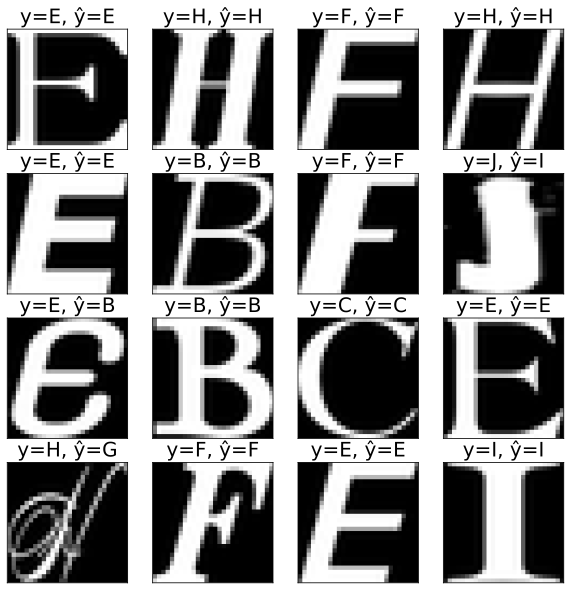

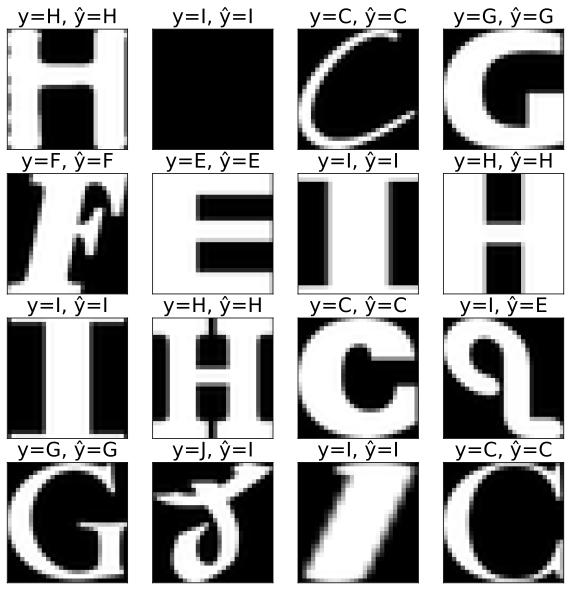

In [40]:
# * visualize several test samples and their predictions
# We will take best and worst models

rng = np.random.default_rng()

model = LogisticRegression(C=best_c, max_iter=1000) # best_c is taken from cell above
model.fit(X_train, y_train)
lr_y_hat_test = model.predict(X_test)
plot_letters(X=X_test, y_pred=lr_y_hat_test, y_true=y_test, random_state=rng.integers(low=100, high=999))

model = LogisticRegression(C=worst_c, max_iter=1000) # worst_c is taken from cell above
model.fit(X_train, y_train)
lr_y_hat_test = model.predict(X_test)
plot_letters(X=X_test, y_pred=lr_y_hat_test, y_true=y_test, random_state=rng.integers(low=100, high=999))

## Task 1.4 (1 point)

Take two best models from previous tasks, k-NN and logistic regression, and show several digits which are

* classified correctly by both models
* classified correctly by k-NN but misclassified by logistic regression
* classified correctly by logistic regression but misclassified by k-NN
* misclassifed by both models

Find the most common class in each category.

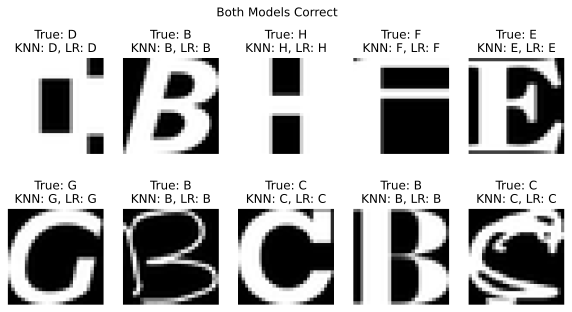

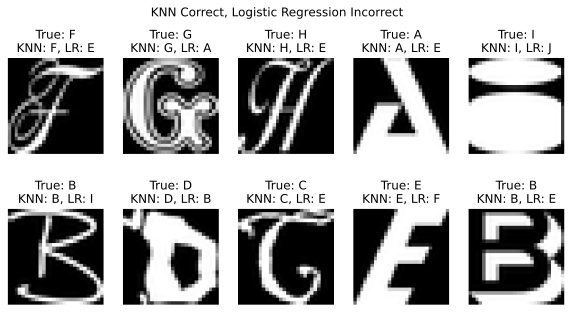

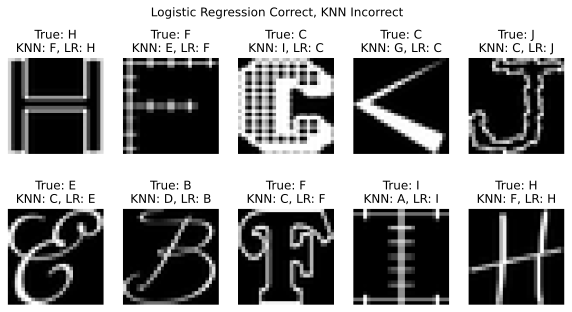

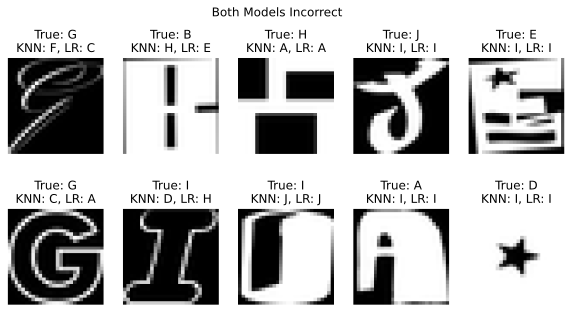

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# thow models with best accuracy results
knn = KNeighborsClassifier(n_neighbors=9)
log_reg = LogisticRegression(C=best_c, max_iter=1000)

# Train the models
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Get predictions for both models
knn_pred = knn.predict(X_test)
log_reg_pred = log_reg.predict(X_test)

# Masks
both_correct = (knn_pred == y_test) & (log_reg_pred == y_test)
knn_correct_logreg_wrong = (knn_pred == y_test) & (log_reg_pred != y_test)
logreg_correct_knn_wrong = (log_reg_pred == y_test) & (knn_pred != y_test)
both_wrong = (knn_pred != y_test) & (log_reg_pred != y_test)

# Find the indices where both models made incorrect predictions
both_correct_indecies = np.where(both_correct)[0]
both_wrong_indices = np.where(both_wrong)[0]
knn_correct_logreg_wrong_indices = np.where(knn_correct_logreg_wrong)[0]
logreg_correct_knn_wrong_indices = np.where(logreg_correct_knn_wrong)[0]

# Function to plot incorrect classifications with their true and predicted labels
def plot_incorrect_predictions(indices, title, model_1_pred, model_2_pred):
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(indices[:10]):  # Display only 10 examples
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')  # Assuming 28x28 pixel images
        true_label = chr(ord("A") + y_test[idx])
        model_1_label = chr(ord("A") + model_1_pred[idx])
        model_2_label = chr(ord("A") + model_2_pred[idx])
        plt.title(f'True: {true_label}\nKNN: {model_1_label}, LR: {model_2_label}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot results for cases where both models are incorrect
plot_incorrect_predictions(both_correct_indecies, 'Both Models Correct', knn_pred, log_reg_pred)
plot_incorrect_predictions(knn_correct_logreg_wrong_indices, 'KNN Correct, Logistic Regression Incorrect', knn_pred, log_reg_pred)
plot_incorrect_predictions(logreg_correct_knn_wrong_indices, 'Logistic Regression Correct, KNN Incorrect', knn_pred, log_reg_pred)
plot_incorrect_predictions(both_wrong_indices, 'Both Models Incorrect', knn_pred, log_reg_pred)

## Task 1.5 (2 points)

Fetch California Housing dataset:

In [36]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


* Split California Housing dataset into train and test
* Train linear regression, Ridge regression, LASSO and Elastic Net.
* For each model calculate MSE and $R^2$-score on both train and test dataset, and visualize them using bar plots
* Print out coefficients of each model and note if some of them are equal to $0$
* Find the model with best test metric 

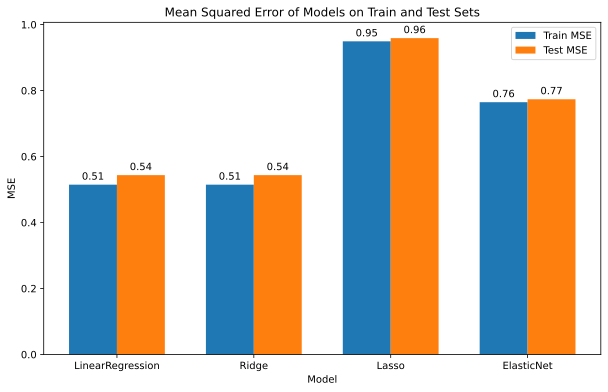

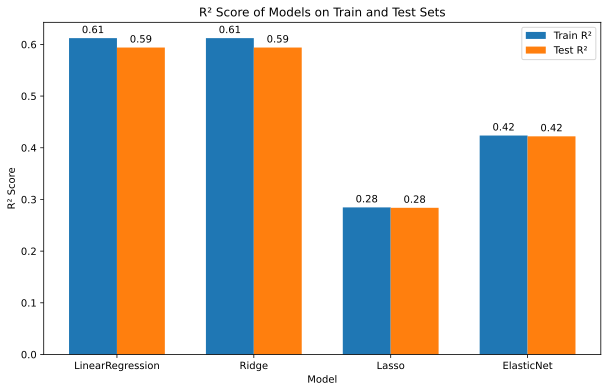

The best model based on test R² score is: Ridge with R² = 0.5940


In [51]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize models
lr = LinearRegression()
ri = Ridge(max_iter=1000)
lasso = Lasso(max_iter=1000)
el_net = ElasticNet(max_iter=1000)

# Train and predict for Linear Regression
lr.fit(X_train, y_train)
lr_train_hat = lr.predict(X_train)
lr_test_hat = lr.predict(X_test)
lr_train_mse = mse(y_train, lr_train_hat)
lr_test_mse = mse(y_test, lr_test_hat)
lr_train_r2 = r2(y_train, lr_train_hat)
lr_test_r2 = r2(y_test, lr_test_hat)

# Train and predict for Ridge Regression
ri.fit(X_train, y_train)
ri_train_hat = ri.predict(X_train)
ri_test_hat = ri.predict(X_test)
ri_train_mse = mse(y_train, ri_train_hat)
ri_test_mse = mse(y_test, ri_test_hat)
ri_train_r2 = r2(y_train, ri_train_hat)
ri_test_r2 = r2(y_test, ri_test_hat)

# Train and predict for LASSO
lasso.fit(X_train, y_train)
lasso_train_hat = lasso.predict(X_train)
lasso_test_hat = lasso.predict(X_test)
lasso_train_mse = mse(y_train, lasso_train_hat)
lasso_test_mse = mse(y_test, lasso_test_hat)
lasso_train_r2 = r2(y_train, lasso_train_hat)
lasso_test_r2 = r2(y_test, lasso_test_hat)

# Train and predict for ElasticNet
el_net.fit(X_train, y_train)
el_net_train_hat = el_net.predict(X_train)
el_net_test_hat = el_net.predict(X_test)
el_net_train_mse = mse(y_train, el_net_train_hat)
el_net_test_mse = mse(y_test, el_net_test_hat)
el_net_train_r2 = r2(y_train, el_net_train_hat)
el_net_test_r2 = r2(y_test, el_net_test_hat)

# Store results in a dictionary for easy plotting
models = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']
train_mse = [lr_train_mse, ri_train_mse, lasso_train_mse, el_net_train_mse]
test_mse = [lr_test_mse, ri_test_mse, lasso_test_mse, el_net_test_mse]
train_r2 = [lr_train_r2, ri_train_r2, lasso_train_r2, el_net_train_r2]
test_r2 = [lr_test_r2, ri_test_r2, lasso_test_r2, el_net_test_r2]

# Bar plot for MSE
x = np.arange(len(models))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, train_mse, width, label='Train MSE')
bar2 = ax.bar(x + width/2, test_mse, width, label='Test MSE')

# Add labels, title, and custom ticks
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
ax.set_title('Mean Squared Error of Models on Train and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show bar values
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

# Bar plot for R² score
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, train_r2, width, label='Train R²')
bar2 = ax.bar(x + width/2, test_r2, width, label='Test R²')

# Add labels, title, and custom ticks
ax.set_xlabel('Model')
ax.set_ylabel('R² Score')
ax.set_title('R² Score of Models on Train and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show bar values
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

# Find the model with the best test R² score
best_model_index = np.argmax(test_r2)
print(f"The best model based on test R² score is: {models[best_model_index]} with R² = {test_r2[best_model_index]:.4f}")

